In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import svd

data = pd.read_csv("fashion_mnist1.csv")

labels = data['label'].values
pixel_data = data.drop('label', axis=1).values

U, S, Vt = svd(pixel_data, full_matrices=False)

PC1 = U[:, 0] * S[0]
PC2 = U[:, 1] * S[1]

plt.figure(figsize=(10, 8))

scatter = plt.scatter(PC1, PC2, c=labels, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, ticks=np.arange(10), label='Label')

plt.title('2D Plot of 1st and 2nd Principal Components (SVD)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()


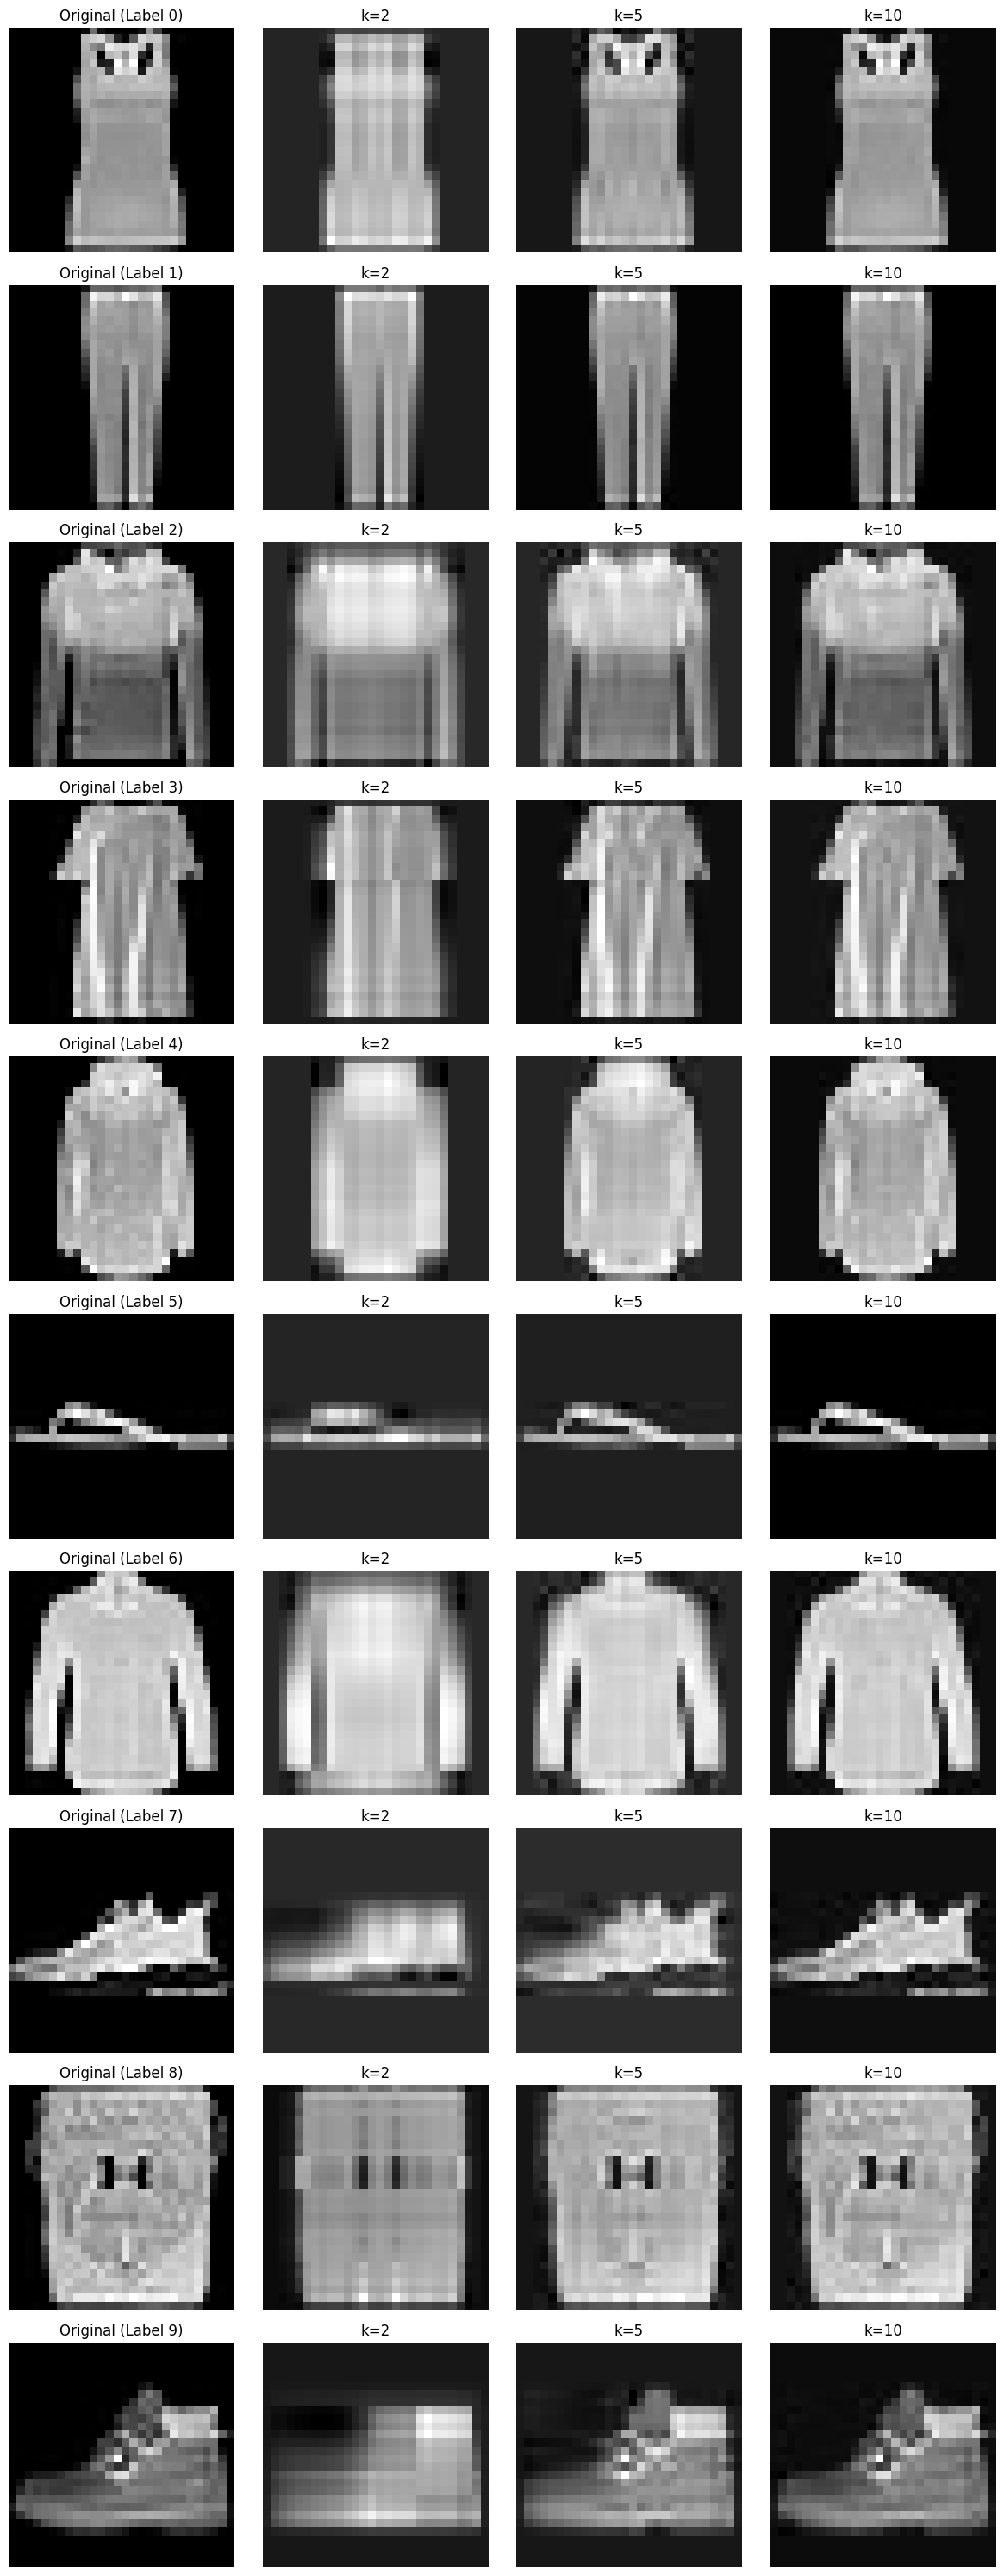

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import svd

data = pd.read_csv("fashion_mnist1.csv")

labels = data['label'].values
pixel_data = data.drop('label', axis=1).values

unique_labels = np.unique(labels)
selected_images = []

for label in unique_labels[:10]:
    image = pixel_data[labels == label][0]
    selected_images.append(image)

selected_images = np.array(selected_images)

def compress_image(image, k):
    U, S, Vt = svd(image, full_matrices=False)
    
    Uk = U[:, :k]
    Sk = np.diag(S[:k])
    Vtk = Vt[:k, :]
    
    reconstructed = np.dot(Uk, np.dot(Sk, Vtk))
    return reconstructed

compressed_images_k2 = [compress_image(image.reshape(28, 28), 2) for image in selected_images]
compressed_images_k5 = [compress_image(image.reshape(28, 28), 5) for image in selected_images]
compressed_images_k10 = [compress_image(image.reshape(28, 28), 10) for image in selected_images]

fig, axes = plt.subplots(10, 4, figsize=(12, 30))

for i in range(10):
    axes[i, 0].imshow(selected_images[i].reshape(28, 28), cmap='gray')
    axes[i, 0].set_title(f'Original (Label {unique_labels[i]})')
    axes[i, 0].axis('off')
    
    axes[i, 1].imshow(compressed_images_k2[i], cmap='gray')
    axes[i, 1].set_title('k=2')
    axes[i, 1].axis('off')
    
    axes[i, 2].imshow(compressed_images_k5[i], cmap='gray')
    axes[i, 2].set_title('k=5')
    axes[i, 2].axis('off')
    
    axes[i, 3].imshow(compressed_images_k10[i], cmap='gray')
    axes[i, 3].set_title('k=10')
    axes[i, 3].axis('off')

plt.tight_layout()
plt.show()


In [3]:
import numpy as np

perplexity = 30
learning_rate = 200
momentum = 0.9
iterations = 1000
early_exaggeration = 4.0
n_components = 2

def compute_high_dimensional_probabilities(X, perplexity):
    (n, d) = X.shape
    P = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            diff = X[i] - X[j]
            distance = np.dot(diff, diff.T)
            P[i, j] = np.exp(-distance / (2 * perplexity ** 2))
            P[j, i] = P[i, j]
    P /= np.sum(P, axis=1, keepdims=True)
    return P

def compute_low_dimensional_probabilities(Y):
    (n, d) = Y.shape
    Q = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            diff = Y[i] - Y[j]
            distance = np.dot(diff, diff.T)
            Q[i, j] = 1 / (1 + distance)
            Q[j, i] = Q[i, j]
    Q /= np.sum(Q, axis=1, keepdims=True)
    return Q

def compute_gradient(P, Q, Y):
    (n, d) = Y.shape
    dY = np.zeros((n, d))
    for i in range(n):
        for j in range(n):
            diff = Y[i] - Y[j]
            q_ij = Q[i, j]
            p_ij = P[i, j]
            dY[i] += 4 * (p_ij - q_ij) * diff * (1 / (1 + np.sum(diff ** 2)))
    return dY

def initialize_Y(n, d):
    return np.random.randn(n, d)

def t_sne(X, n_components=2, perplexity=30, learning_rate=200, momentum=0.9, iterations=1000):
    (n, d) = X.shape
    
    P = compute_high_dimensional_probabilities(X, perplexity)
    
    Y = initialize_Y(n, n_components)
    Y_prev = np.zeros_like(Y)
    
    for t in range(iterations):
        Q = compute_low_dimensional_probabilities(Y)
        
        grad = compute_gradient(P, Q, Y)
        
        Y_next = Y + learning_rate * grad + momentum * (Y - Y_prev)
        
        Y_prev = Y
        Y = Y_next
    
    return Y

In [4]:
import numpy as np
import matplotlib.pyplot as plt

hyperparams = [
    {"perplexity": 10, "learning_rate": 100, "momentum": 0.5, "iterations": 500},
    {"perplexity": 30, "learning_rate": 200, "momentum": 0.8, "iterations": 1000},
    {"perplexity": 50, "learning_rate": 50, "momentum": 0.9, "iterations": 1500},
    {"perplexity": 40, "learning_rate": 300, "momentum": 0.6, "iterations": 750},
    {"perplexity": 20, "learning_rate": 150, "momentum": 0.7, "iterations": 500},
]

def compute_high_dimensional_probabilities(X, perplexity):
    (n, d) = X.shape
    P = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            diff = X[i] - X[j]
            distance = np.dot(diff, diff.T)
            P[i, j] = np.exp(-distance / (2 * perplexity ** 2))
            P[j, i] = P[i, j]
    P /= np.sum(P, axis=1, keepdims=True)
    return P

def compute_low_dimensional_probabilities(Y):
    (n, d) = Y.shape
    Q = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            diff = Y[i] - Y[j]
            distance = np.dot(diff, diff.T)
            Q[i, j] = 1 / (1 + distance)
            Q[j, i] = Q[i, j]
    Q /= np.sum(Q, axis=1, keepdims=True)
    return Q

def compute_gradient(P, Q, Y):
    (n, d) = Y.shape
    dY = np.zeros((n, d))
    for i in range(n):
        for j in range(n):
            diff = Y[i] - Y[j]
            q_ij = Q[i, j]
            p_ij = P[i, j]
            dY[i] += 4 * (p_ij - q_ij) * diff * (1 / (1 + np.sum(diff ** 2)))
    return dY

def initialize_Y(n, d):
    return np.random.randn(n, d)

def t_sne(X, n_components=2, perplexity=30, learning_rate=200, momentum=0.9, iterations=1000):
    (n, d) = X.shape
    
    P = compute_high_dimensional_probabilities(X, perplexity)
    
    Y = initialize_Y(n, n_components)
    Y_prev = np.zeros_like(Y)
    
    for t in range(iterations):
        Q = compute_low_dimensional_probabilities(Y)
        
        grad = compute_gradient(P, Q, Y)
        
        Y_next = Y + learning_rate * grad + momentum * (Y - Y_prev)
        
        Y_prev = Y
        Y = Y_next
    
    return Y
